In [49]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Load the train and test datasets
train = pd.read_csv("C:/Users/dheve/OneDrive/Desktop/ml_assignment/Logistic Regression/Titanic_train.csv")
test = pd.read_csv("C:/Users/dheve/OneDrive/Desktop/ml_assignment/Logistic Regression/Titanic_test.csv")

# Check the first few rows of the datasets
print(train.head())
print(test.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [33]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [34]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [35]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [36]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [37]:
# Check for data types and summary statistics
print(train.info())
print(train.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

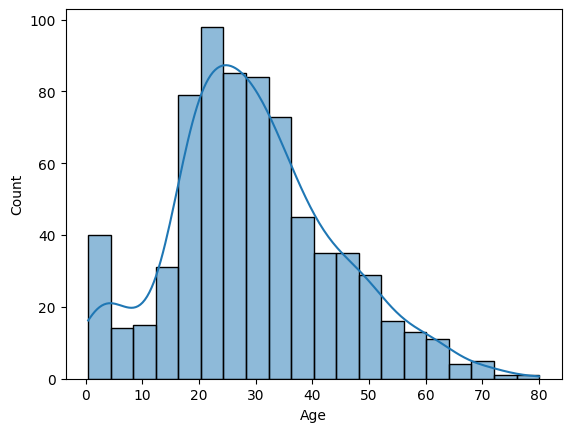

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of numerical features
sns.histplot(train['Age'], kde=True)
plt.show()

# Visualize the relationship between 'Pclass' and survival rate





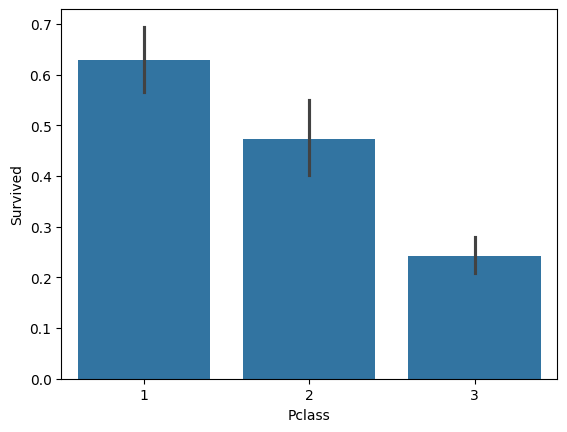

In [39]:
sns.barplot(x='Pclass', y='Survived', data=train)
plt.show()

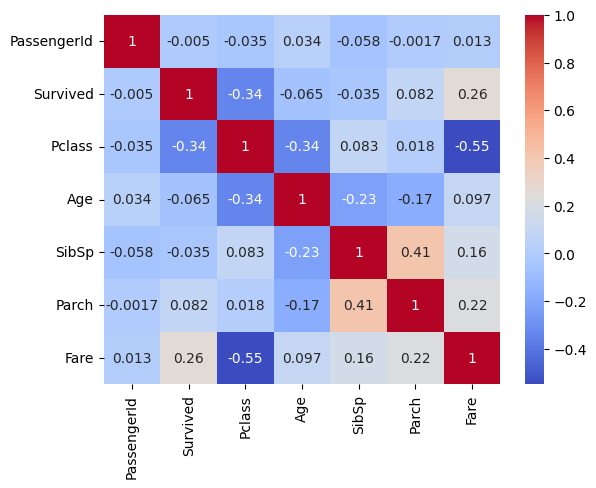

In [46]:
heat=train.corr(numeric_only=True)
sns.heatmap(heat, annot=True, cmap='coolwarm')
plt.show()

In [50]:
# Handle missing values
train['Age'].fillna(train['Age'].median(), inplace=True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)



In [51]:
# One-hot encoding for 'Sex' and 'Embarked'
train = pd.get_dummies(train, columns=['Sex', 'Embarked'], drop_first=True)

# Label encoding for 'Pclass'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Pclass'] = le.fit_transform(train['Pclass'])


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Select features and target variable
X = train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']]
y = train['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

Accuracy: 0.8100558659217877
Precision: 0.803030303030303
Recall: 0.7162162162162162
F1-Score: 0.7571428571428571
ROC-AUC Score: 0.7962033462033462


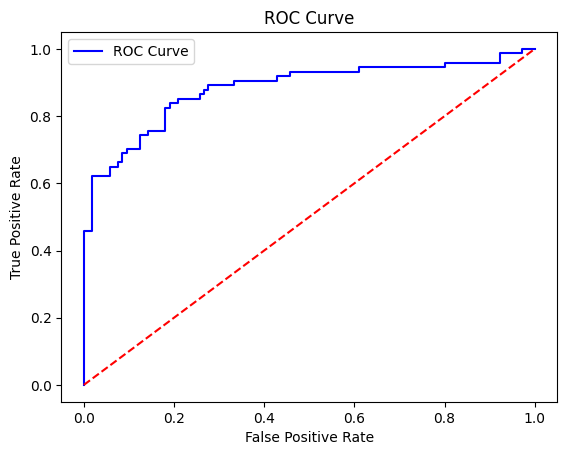

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC-AUC Score: {roc_auc}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [54]:
# Print the coefficients
coefficients = pd.DataFrame(model.coef_[0], X.columns, columns=['Coefficient'])
print(coefficients)


            Coefficient
Pclass        -0.964099
Age           -0.032561
SibSp         -0.318301
Parch         -0.097558
Fare           0.003763
Sex_male      -2.581080
Embarked_Q     0.242283
Embarked_S     0.046458


In [58]:
with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model saved as 'logistic_regression_model.pkl'")

Model saved as 'logistic_regression_model.pkl'


# interview
1.What is the difference between precision and recall?


Precision vs Recall
Precision: Proportion of true positive predictions among all positive predictions. Focuses on reducing false positives.

Precision=TP/(FP+TP)
​
 
Use: Important when false positives are costly (e.g., spam detection).

Recall: Proportion of true positive predictions among all actual positives. Focuses on reducing false negatives.

Recall=TP/(TP+FN)
 
Use: Important when false negatives are costly (e.g., disease detection).

Key Difference: Precision is about accuracy of positives, while recall is about completeness of positives.




2. What is cross-validation, and why is it important in binary classification?


Cross-Validation
Definition: A technique to evaluate model performance by splitting data into 
k folds for training and testing, ensuring generalization.

Importance in Binary Classification:
Reduces overfitting.
Provides robust performance estimates.
Handles imbalanced data better (via stratified CV).
Helps in model and hyperparameter selection.

Example: In 5-fold cross-validation, the dataset is split into 5 parts. Each part is tested once while the rest are used for training, and the results are averaged.






